# load data & library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv('./bike/train.csv')
print(train.shape)
train.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [3]:
test = pd.read_csv('./bike/test.csv')
print(test.shape)
test.head(3)

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [4]:
set(train.columns) - set(test.columns)

{'casual', 'count', 'registered'}

# 데이터 살펴보기

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [7]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [9]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


# 데이터 전처리 : 파생 변수

In [11]:
train["datetime"]

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [12]:
train["datetime"] = pd.to_datetime(train["datetime"])
train["datetime"]

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [13]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [15]:
test["datetime"] = pd.to_datetime(test["datetime"])

In [16]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second

In [17]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


# 데이터 시각화

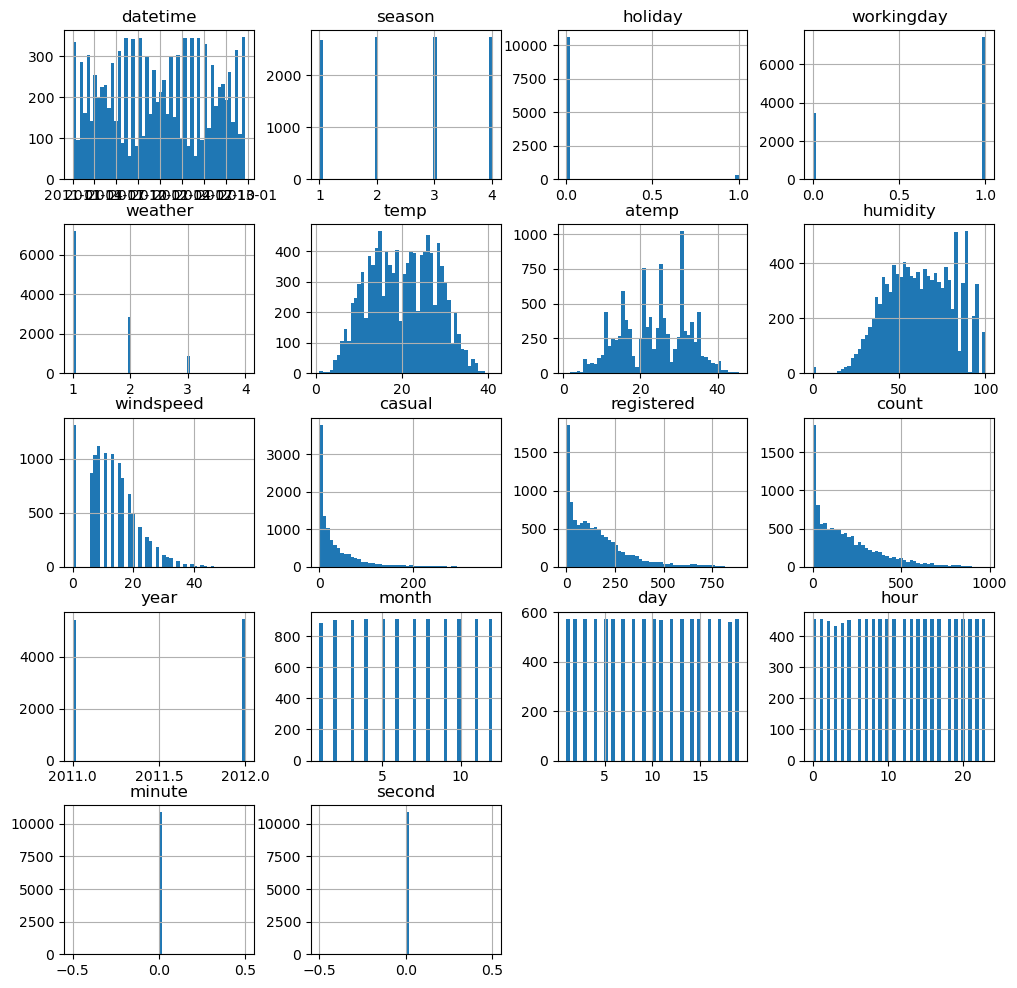

In [18]:
train.hist(bins=50, figsize=(12, 12));

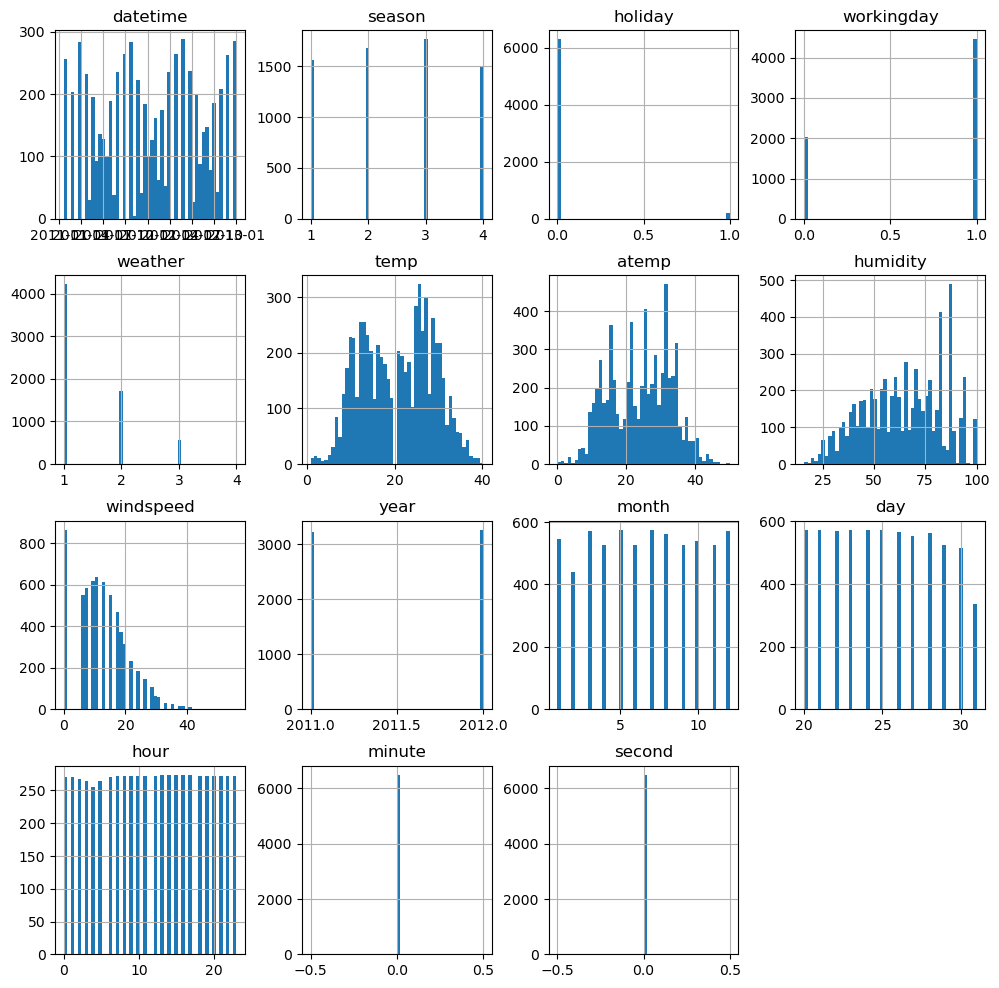

In [19]:
test.hist(bins=50, figsize=(12, 12));

In [20]:
train[train['windspeed'] == 0].shape

(1313, 18)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

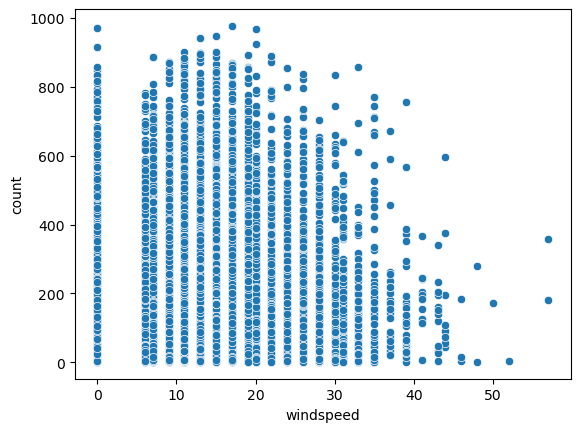

In [21]:
# 풍속이 0인값이 많다?
sns.scatterplot(data=train, x="windspeed", y="count")

<AxesSubplot:xlabel='humidity', ylabel='count'>

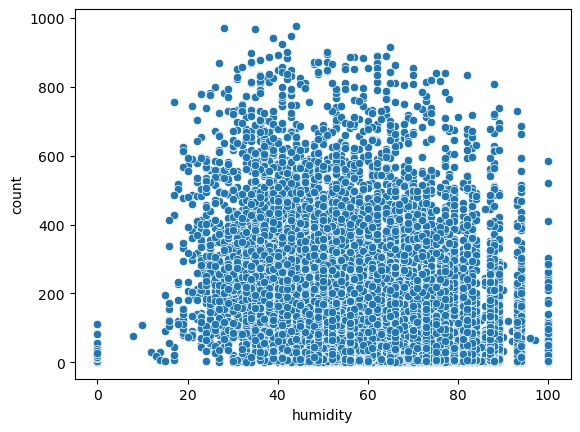

In [22]:
# 둘의 상관이 크다면 결측치를 전처리 해줄 수 있지만 커보이지 않음
# 습도와 자전거 대여량은 상관이 없어 보임
sns.scatterplot(data=train, x="humidity", y="count")

<AxesSubplot:xlabel='temp', ylabel='atemp'>

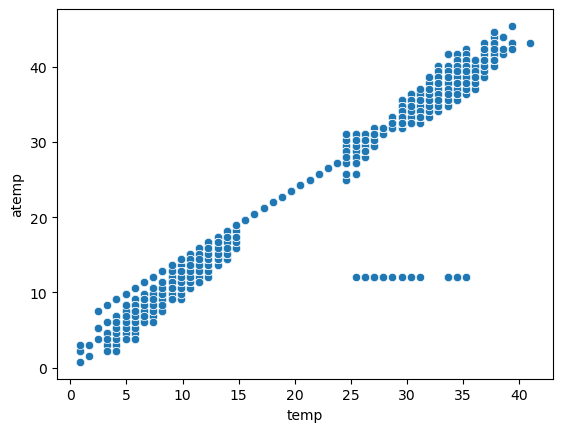

In [23]:
# 온도와 체감온도의 경우 강한 상관관계를 보임
# 우측 하단에 있는 데이터의 경우 이상치라기 보다는 오류 데이터로 보임
sns.scatterplot(data=train, x= 'temp', y='atemp')

## 오류 데이터 확인

In [24]:
condition = (train['temp'] > 35) & (train['atemp'] < 20)
train.loc[condition, 'atemp']

9005    12.12
9006    12.12
Name: atemp, dtype: float64

In [25]:
condition = (train['temp'] > 20) & (train['atemp'] == 12.12)
print(train.loc[condition, :].shape)
train.loc[condition, :]

(24, 18)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
8991,2012-08-17 00:00:00,3,0,1,1,27.88,12.12,57,11.0014,21,67,88,2012,8,17,0,0,0
8992,2012-08-17 01:00:00,3,0,1,1,27.06,12.12,65,7.0015,16,38,54,2012,8,17,1,0,0
8993,2012-08-17 02:00:00,3,0,1,1,27.06,12.12,61,8.9981,4,15,19,2012,8,17,2,0,0
8994,2012-08-17 03:00:00,3,0,1,1,26.24,12.12,65,7.0015,0,6,6,2012,8,17,3,0,0
8995,2012-08-17 04:00:00,3,0,1,1,26.24,12.12,73,11.0014,0,9,9,2012,8,17,4,0,0
8996,2012-08-17 05:00:00,3,0,1,1,26.24,12.12,73,7.0015,2,34,36,2012,8,17,5,0,0
8997,2012-08-17 06:00:00,3,0,1,1,25.42,12.12,78,8.9981,6,151,157,2012,8,17,6,0,0
8998,2012-08-17 07:00:00,3,0,1,1,26.24,12.12,73,7.0015,11,368,379,2012,8,17,7,0,0
8999,2012-08-17 08:00:00,3,0,1,1,27.88,12.12,65,8.9981,43,625,668,2012,8,17,8,0,0
9000,2012-08-17 09:00:00,3,0,1,1,28.70,12.12,58,7.0015,58,320,378,2012,8,17,9,0,0


<AxesSubplot:xlabel='weather', ylabel='count'>

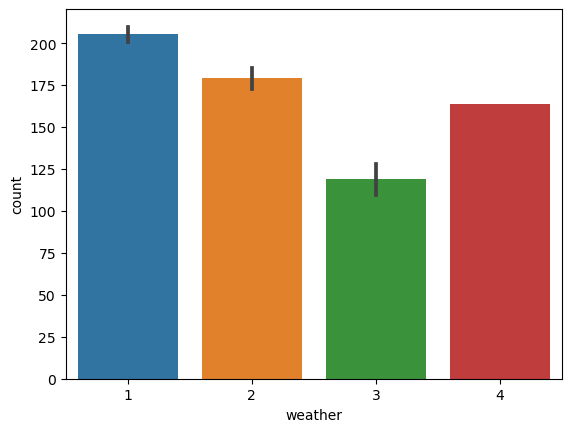

In [26]:
# 날씨에 따른 저전거 평균 대여 수
sns.barplot(data=train, x='weather', y='count')

In [27]:
# 데이터가 하나기 때문에 일반화하기 어려움
train[train['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0


<AxesSubplot:xlabel='day', ylabel='count'>

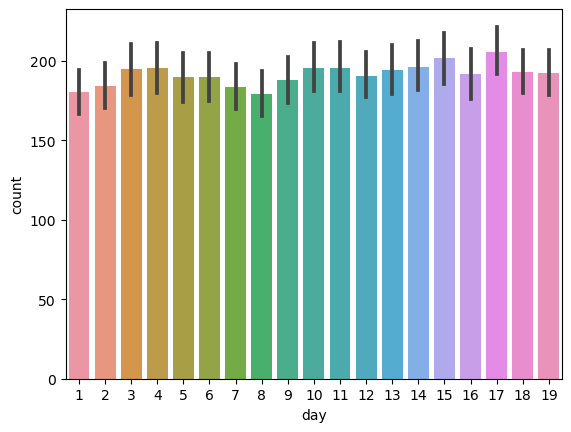

In [50]:
# train과 test의 날짜가 달라 day column은 제거하는게 도움
sns.barplot(data=train, x='day', y='count')

<AxesSubplot:xlabel='day', ylabel='count'>

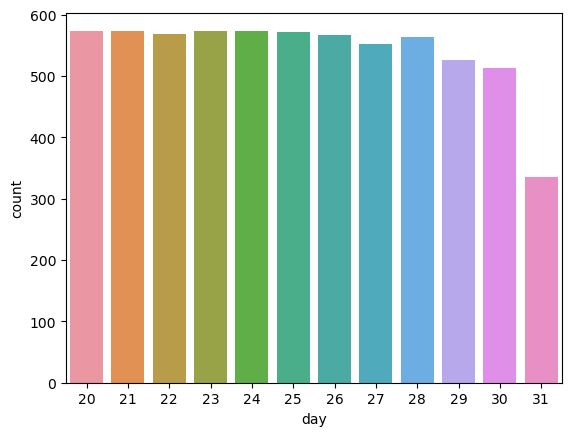

In [54]:
sns.countplot(data=test, x='day')

<AxesSubplot:xlabel='month', ylabel='count'>

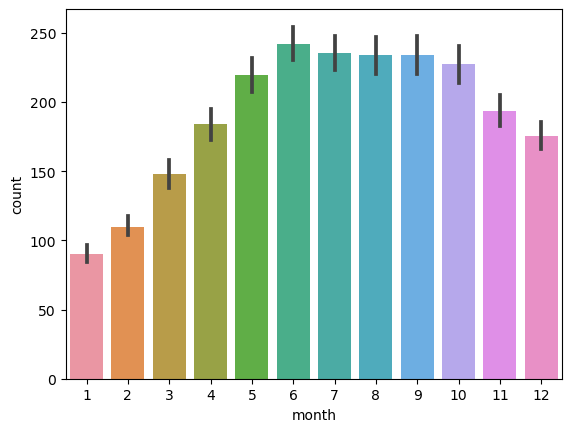

In [55]:
# 월별로 대여량에 차이를 보이므로 feature로 사용하는 것이 좋아보임
sns.barplot(data=train, x='month', y='count')

<AxesSubplot:xlabel='month', ylabel='count'>

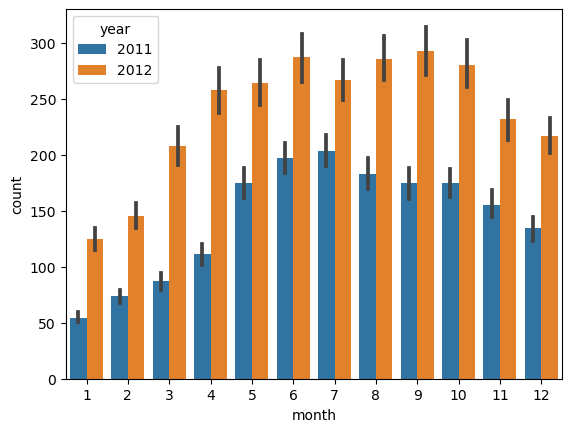

In [56]:
# 하지만 연별로 월 대여량을 보면 같은 달이라도 2배 차이가 나는 달이 있기 때문에 모델이 예측하는 것에 도움이 되지 않을 수 있음
sns.barplot(data=train, x='month', y='count', hue='year')

In [61]:
# season은 계절이라기보다 분기라고 해석하는 것이 맞다
train.groupby("season")['month'].unique()

season
1       [1, 2, 3]
2       [4, 5, 6]
3       [7, 8, 9]
4    [10, 11, 12]
Name: month, dtype: object

In [62]:
train.groupby("season")['month'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,2.006329,0.815331,1.0,1.0,2.0,3.0,3.0
2,2733.0,5.001098,0.816421,4.0,4.0,5.0,6.0,6.0
3,2733.0,7.998902,0.816421,7.0,7.0,8.0,9.0,9.0
4,2734.0,11.000366,0.816721,10.0,10.0,11.0,12.0,12.0


<AxesSubplot:xlabel='season', ylabel='count'>

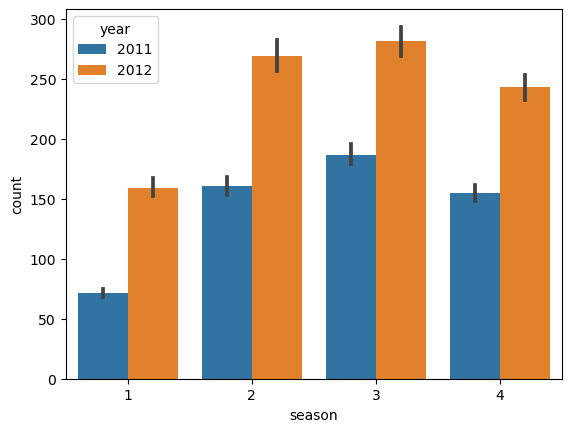

In [57]:
sns.barplot(data=train, x='season', y='count', hue='year')

In [63]:
train['year-month'] = train["datetime"].astype(str).str[:7]
test['year-month'] = test["datetime"].astype(str).str[:7]

<AxesSubplot:xlabel='year-month', ylabel='count'>

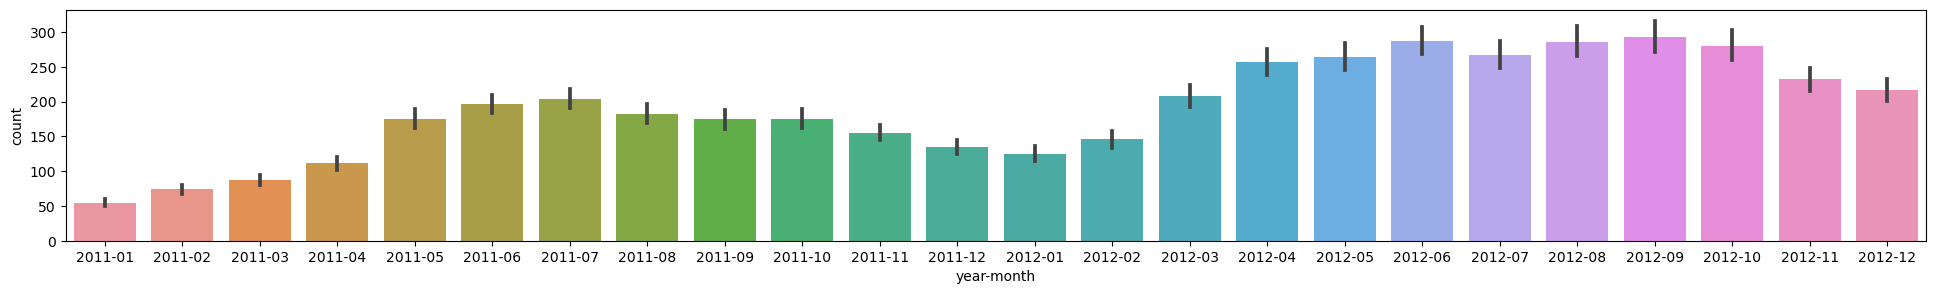

In [64]:
plt.figure(figsize=(24, 3))
sns.barplot(data=train, x="year-month", y='count')

<AxesSubplot:xlabel='year-month', ylabel='count'>

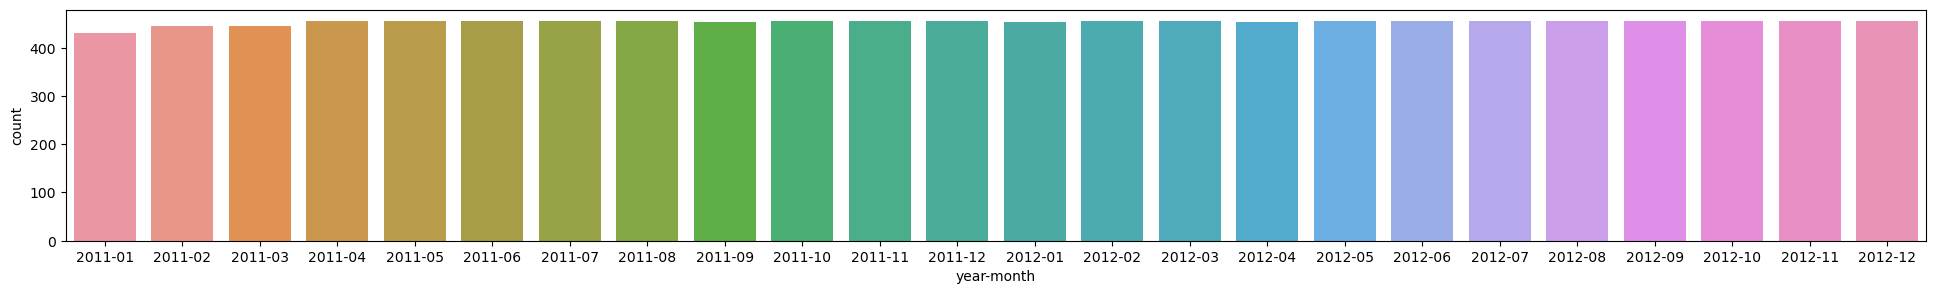

In [66]:
plt.figure(figsize=(24, 3))
sns.countplot(data=train, x="year-month")

In [69]:
# 인코딩 해주기 위해 category type으로 변경
train["year-month-code"] = train['year-month'].astype("category").cat.codes
train["year-month-code"]

0         0
1         0
2         0
3         0
4         0
         ..
10881    23
10882    23
10883    23
10884    23
10885    23
Name: year-month-code, Length: 10886, dtype: int8

In [70]:
test["year-month-code"] = test['year-month'].astype("category").cat.codes

# feature & label

In [28]:
label = 'count'
label

'count'

In [119]:
feature_names = train.columns.tolist()
feature_names

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'year-month',
 'year-month-code']

In [30]:
feature_names.remove(label)
feature_names.remove('datetime')
feature_names.remove('casual')
feature_names.remove('registered')
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second']

In [122]:
feature_names = [
#                  'datetime',
                 'season',
                 'holiday',
                 'workingday',
                 'weather',
                 'temp',
                 'atemp',
                 'humidity',
                 'windspeed',
                 'year',
#                  'month',
                 'day',
                 'hour',
#                  'year-month',
                 'year-month-code']
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'day',
 'hour',
 'year-month-code']

# train & test

In [123]:
X_train = train[feature_names]
y_train = train[label]
X_train.shape, y_train.shape

((10886, 12), (10886,))

In [124]:
X_test = test[feature_names]
X_test.shape

(6493, 12)

# ML : RandomForestRegressor

In [125]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_jobs=-1, max_features=0.8, max_depth=15)
model

RandomForestRegressor(max_depth=15, max_features=0.8, n_jobs=-1,
                      random_state=42)

# cross validate

In [126]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_valid_predict

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.6s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished


array([ 77.9875    ,  77.45728571,  51.22371429, ..., 163.2079531 ,
       147.72943184,  95.24626442])

# 평가

## MAE

In [127]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, y_valid_predict)

49.38790669959618

In [128]:
abs(y_train - y_valid_predict).mean()

49.38790669959618

## MSE

In [129]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_valid_predict)

5327.534448606105

In [130]:
((y_train - y_valid_predict) ** 2).mean()

5327.534448606136

## RMSE

In [131]:
mean_squared_error(y_train, y_valid_predict) ** 0.5

72.98996128650916

## RMSLE

<AxesSubplot:xlabel='count', ylabel='Density'>

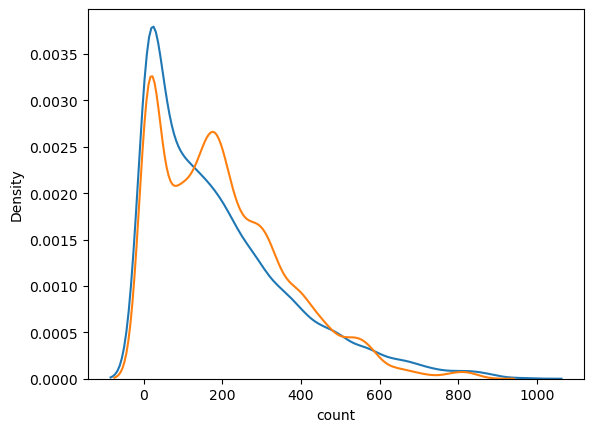

In [132]:
sns.kdeplot(y_train)
sns.kdeplot(y_valid_predict)

<AxesSubplot:xlabel='count'>

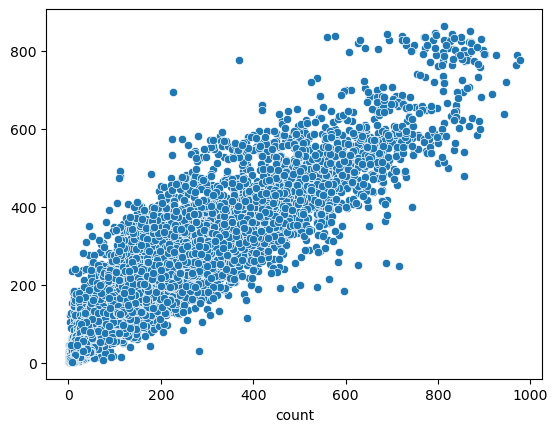

In [133]:
sns.scatterplot(x=y_train, y=y_valid_predict)

<AxesSubplot:xlabel='count', ylabel='Density'>

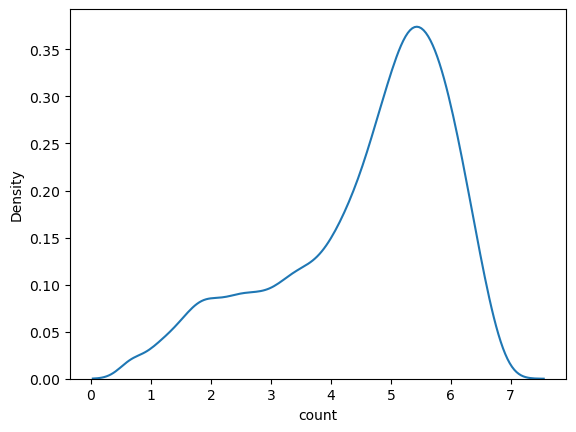

In [134]:
# count의 스케일 감소
# 로그를 취하면 skewed 값이 덜 skewed 하게 (덜 찌그러지게) 됨
# 분포가 좀 더 정규분포에 가까워지기도 함
sns.kdeplot(np.log(train["count"] + 1))

<AxesSubplot:xlabel='count', ylabel='Density'>

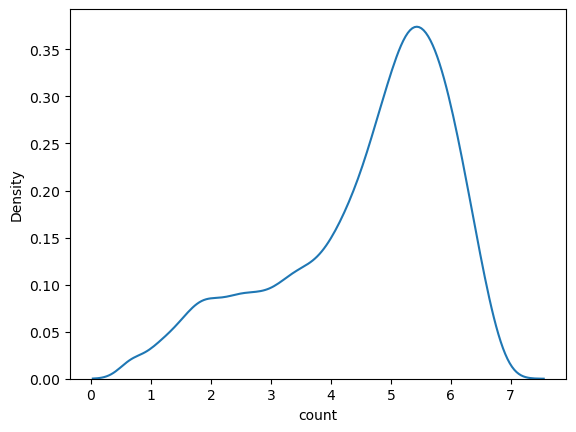

In [135]:
# 위랑 똑같은 기능의 코드
sns.kdeplot(np.log1p(train['count']))

In [136]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_train, y_valid_predict) ** 0.5

0.5224627745239306

In [137]:
rmsle = np.sqrt(((np.log1p(y_train) - np.log1p(y_valid_predict)) ** 2).mean())
rmsle

0.5224627745239306

# 학습과 예측

In [138]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=0.8, n_jobs=-1,
                      random_state=42)

<AxesSubplot:>

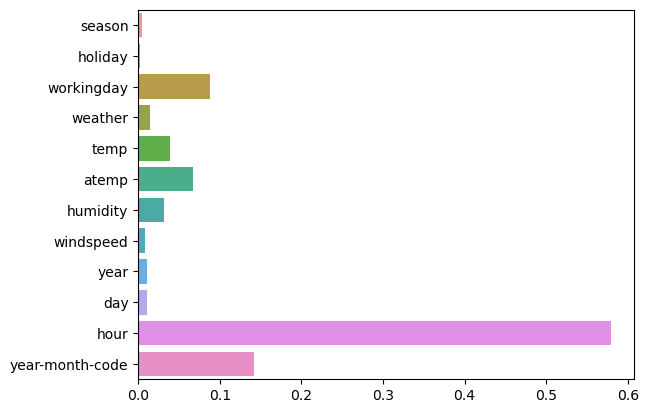

In [139]:
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

In [140]:
y_predict = model.predict(X_test)
y_predict[:5]

array([11.75227448,  6.46148428,  4.55086724,  3.19192637,  2.80995975])

/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy versio

# 제출

In [114]:
submit = pd.read_csv('./bike/sampleSubmission.csv')
submit.head(2)

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0


In [115]:
submit["count"] = y_predict
submit.head(2)

,datetime,count
0,2011-01-20 00:00:00,9.785889
1,2011-01-20 01:00:00,5.117501


In [116]:
file_name = f"./bike/submit_{rmsle:.5f}.csv"
file_name

'./bike/submit_0.51464.csv'

In [117]:
submit.to_csv(file_name, index=False)

In [118]:
pd.read_csv(file_name).head(2)

,datetime,count
0,2011-01-20 00:00:00,9.785889
1,2011-01-20 01:00:00,5.117501


/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy versio